In [5]:
from __future__ import print_function
import pandas as pd
import pylab as pl
import json
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
#the data is from NYC Open Data https://data.cityofnewyork.us/Social-Services/NYC-Women-s-Resource-Network-Database/pqg4-dm6b
womenserv = pd.read_csv("https://data.cityofnewyork.us/api/views/pqg4-dm6b/rows.csv?accessType=DOWNLOAD")
womenserv.head()

,OrganizationName,Brooklyn,Bronx,Manhattan,Queens,Staten Island,Fax,Phone,URL,noURL,...,Community Board,City Council,Census Tract,BIN,BBL,NTA,Address1,Address2,City,Postcode
0,"First Saturday in October, Inc.",N,Y,N,N,N,7.185906e+09,7.185908e+09,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"198 East 161st St, Ste. 201",NaN,Bronx,NaN
1,Supportive Childrens Advocacy Network (SCAN),N,N,Y,N,N,NaN,NaN,NaN,N,...,NaN,NaN,NaN,NaN,NaN,NaN,207 215 E 27th Street,NaN,New York,10016.0
2,Sjogren's Syndrome Foundation,N,N,Y,N,N,NaN,2.127247e+09,http://www.sjogrens.org/,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,109 East 50 Street,NaN,New York,NaN
3,"Guardians of the Sick, Inc.",Y,N,N,N,N,NaN,7.184382e+09,NaN,NaN,...,12.0,44.0,218.0,3138585.0,3.056600e+09,Borough Park ...,5216 11th Avenue,NaN,Brooklyn,11219.0
4,Latin Media and Entertainment Commission,Y,Y,Y,Y,Y,NaN,2.126400e+09,http://www.nyc.gov/html/lmec/html/home/home.shtml,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New York,NaN


In [7]:
#remove all columns i dont need like addresses
womenserv = womenserv.iloc[:,:6]

## one way to do it, i did it in class like this but it is unnecessary - I did it in a better way below
```
for br in womenserv.columns[1:]:
    womenserv[br][womenserv[br] == 'Y'] = 1
    womenserv[br][womenserv[br] == 'N'] = 0
    
womenserv.head()

```

In [8]:
# replacing N and Y with 0 and 1
womenserv.replace({"Y":1}, inplace=True)
womenserv.replace({"N":0}, inplace=True)

### Jaccard distance: co-occurrences / all

Think about the distance between two objects a as a combination of cooccurrences: a cooccurence is when the feature is true for both objects. 
The Jaccard similarity focuses on the co-occurrence,.

You can also think that the absence of a feature (False) is a way in which objects are similar: two borrows where neither has a service are similar in the absence of the services. The Simple Similarity also includes the simultaneouse lack of occurrence.
---




summing the Brooklyn and Bronx features I find which services are absent in both (0), present in both (2), or present in one but not the other (1)    


In [11]:
print ("which services are in Brooklyn or the Bronx?")
coocc =  womenserv.Brooklyn + womenserv.Bronx
coocc

which services are in Brooklyn or the Bronx?


0       1
1       0
2       0
3       1
4       2
5       2
6       0
7       0
8       0
9       2
10      0
11      0
12      0
13      0
14      1
15      0
16      1
17      0
18      0
19      1
20      0
21      0
22      2
23      0
24      0
25      0
26      2
27      0
28      1
29      1
       ..
1117    1
1118    0
1119    0
1120    0
1121    0
1122    0
1123    0
1124    0
1125    0
1126    0
1127    1
1128    1
1129    1
1130    0
1131    0
1132    1
1133    1
1134    1
1135    0
1136    0
1137    0
1138    1
1139    0
1140    0
1141    1
1142    1
1143    1
1144    1
1145    0
1146    0
Length: 1147, dtype: int64

In [12]:
#Jaccard similarity: cooccurrence (true in both) over where its not absent in both (true in one only or true in both)
print("Bronx-Brooklyn Jaccard similarity %.2f"%(np.sum(coocc == 2) * 1.0 / 
                                                  np.sum(coocc > 0)))
print("Bronx-Brooklyn Jaccard distance %.2f"%(1 - (np.sum(coocc == 2) * 1.0 / 
                                                   np.sum(coocc > 0))))


Bronx-Brooklyn Jaccard similarity 0.42
Bronx-Brooklyn Jaccard distance 0.58


In [14]:
#Simple similarity: cooccurrence (true in both), lack in both (False in both) over all possibilities
print("Bronx-Brooklyn simple similarity %.2f"%((np.sum(coocc == 2) + np.sum(coocc == 0)) * 1.0 / 
                                                len(coocc)))
print("Bronx-Brooklyn simple distance %.2f"%(1 - ((np.sum(coocc == 2) + np.sum(coocc == 0)) * 1.0 / 
                                                len(coocc))))

Bronx-Brooklyn simple similarity 0.77
Bronx-Brooklyn simple distance 0.23


In [15]:
# now with scipy
import scipy as sp
from scipy import spatial

In [16]:
print("Bronx-Brooklyn distance %.2f"%sp.spatial.distance.jaccard(
    womenserv.Brooklyn.values, womenserv.Bronx.values))

Bronx-Brooklyn distance 0.58


#calculate all Jaccard and all simple distances pair by pair and produce a distance matrix between borrows
(e.g. Mn-Bx, Mn-Bk, Bk-Qu... there are 25 distances)

In [17]:
print("The distance between all borrow pairs is:")
sp.spatial.distance.pdist(womenserv.iloc[:,1:].T, metric='Jaccard')

The distance between all borrow pairs is:


array([0.57675439, 0.76157407, 0.65743945, 0.54005168, 0.73868047,
       0.61020408, 0.41750842, 0.77691454, 0.75210084, 0.59529412])

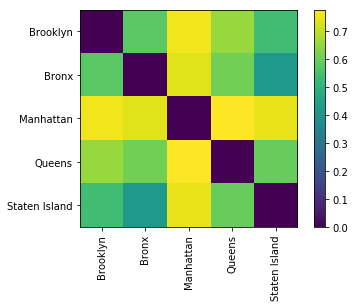

In [18]:
# to plot it I have to turn this vector into a matrix, the function sp.spatial.distance.squareform does that

import pylab as pl
pl.imshow(sp.spatial.distance.squareform(sp.spatial.distance.pdist(
    womenserv.iloc[:,1:].T, metric='Jaccard')))
pl.xticks(range(len(womenserv.columns[1:])), womenserv.columns[1:], rotation=90)
pl.yticks(range(len(womenserv.columns[1:])), womenserv.columns[1:]);
pl.colorbar();